# Lab 5: Regression Inference

**Reading**: 

* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

This assignment is due by **11:59pm on the due date listed in Canvas**. Start early so that you can come to office hours if you're stuck. Check Canvas for the office hours schedule. Late work will not be accepted as per the policies described in the Canvas syllabus. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [30]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import seaborn as sns

import otter
grader = otter.Notebook()
'imports complete'


'imports complete'

## Regression Inference for the NFL Draft

In this homework, we will be analyzing the relationship between draft position and success in the NFL. The NFL draft is an annual event in which every NFL team takes turns choosing players that they will add to their team. There are around 200 selections, called "picks" made every year, although this number has changed over the years.

The `nfl` table has five columns, the name of the `Player`, the `Salary` that player made for the 2019 season, the year that player was drafted (`Year Drafted`), the number of the draft pick that was used when the player was drafted (`Pick Number`), and the `Position` in football that player plays.

Each row in `nfl` corresponds to one player who played in the **2019 season**.

In [31]:
# Just run this cell!
nfl = pd.read_csv("nfl.csv")
nfl.head(5)

,Player,Salary,Year Drafted,Pick Number,Position
0,Baker Mayfield,570000,2018,1,QB
1,Cam Newton,16200000,2011,1,QB
2,Eli Manning,11500000,2004,1,QB
3,Eric Fisher,10350000,2013,1,OT
4,Jadeveon Clowney,15967200,2014,1,DE


#### Question 1

Add a column to the table called `Career Length` that corresponds to how long a player has been in the NFL to the `nfl` table. `Career Length` is from when they were drafted to this year, 2020. So, if a player was drafted in 2015, their career length is 5:
$$2020-2015=5$$

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [32]:
nfl["Career Length"] = 2020 - nfl['Year Drafted'] 

nfl.head(5)

,Player,Salary,Year Drafted,Pick Number,Position,Career Length
0,Baker Mayfield,570000,2018,1,QB,2
1,Cam Newton,16200000,2011,1,QB,9
2,Eli Manning,11500000,2004,1,QB,16
3,Eric Fisher,10350000,2013,1,OT,7
4,Jadeveon Clowney,15967200,2014,1,DE,6


In [33]:
grader.check("q1_1")

q1_1 results: All test cases passed!

As usual, let's investigate our data visually before analyzing it numerically. The first relationship we will analyze is the relationship between a player's `Pick Number` and their `Career Length`. Run the following cell to see a scatter diagram with the line of best fit already plotted for you.

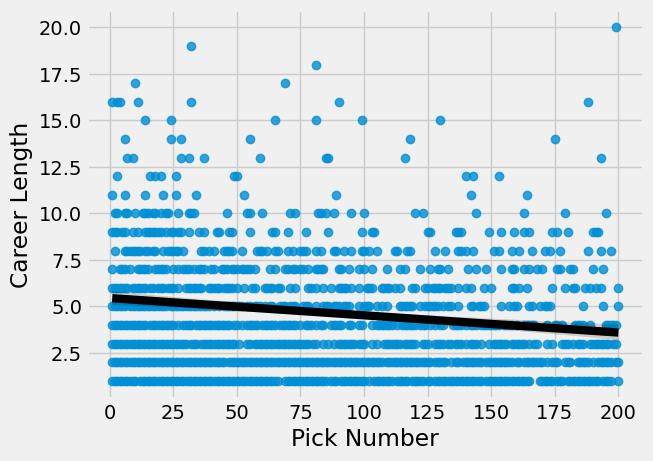

In [34]:
# Just run this cell
sns.regplot(x = "Pick Number", y = "Career Length", data = nfl, line_kws={"color": "black"});

#### Question 2

Use the functions given to assign the correlation between `Pick Number` and `Career Length` to `pick_length_correlation`. `correlation` takes in three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [35]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr) 

def correlation(tbl, col1, col2):
    r = np.mean(standard_units(tbl[col1]) * standard_units(tbl[col2]))
    return r

pick_length_correlation = correlation(nfl, "Pick Number", "Career Length")
pick_length_correlation

-0.16517332737646848

In [36]:
grader.check("q1_2")

q1_2 results: All test cases passed!

We can see that there is a negative association between `Pick Number` and `Career Length`! If in the sample, we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

#### Question 3

Evan thinks that the slope of the true line of best fit for `Pick Number` and `Career Length` is not zero: that is, there is some correlation/association between `Pick Number` and `Career Length`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

The null hypothesis is that there isn't a correlation between the number of a players draft pick and their career length and the correlation is zero.
The alternative hypothesis is that there is a correlation between the number of a players draft pick and their career length.

#### Question 4

Saurav says that instead of finding the slope for each resample, we can find the correlation instead, and that we will get the same result. Why is he correct? What is the relationship between slope and correlation?

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

The slope and the correlation are typically the same number. You find the slope using the correlation. The two are very closely linked.

#### Question 5
Define the function `one_resample_r` that performs a bootstrap and finds the correlation between `Pick Number` and `Career Length` in the resample. `one_resample_r` should take three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [37]:
def one_resample_r(tbl, col1, col2):
    resample = tbl.sample(frac=1, replace=True)
    return correlation(resample, col1, col2)

# Don't change this line below!
one_resample = one_resample_r(nfl, "Pick Number", "Career Length")
one_resample

-0.20029472294047715

In [38]:
grader.check("q1_5")

q1_5 results: All test cases passed!

#### Question 6

Generate 1000 bootstrapped correlations for `Pick Number` and `Career Length`, store your results in the array `resampled_correlations_pc`, and plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->
<!-- EXPORT TO PDF -->

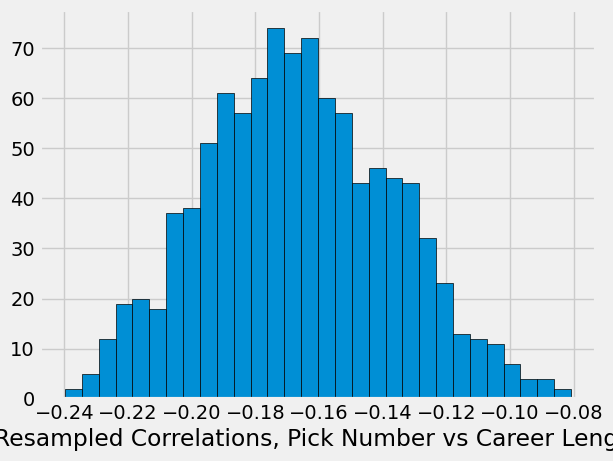

In [39]:
resampled_correlations_pc = np.empty(0)

for i in np.arange(1000):
    resamp = one_resample_r(nfl,"Pick Number", "Career Length")
    resampled_correlations_pc = np.append(resampled_correlations_pc, resamp)

#Plot a histogram of the resulting resample correlations
plt.hist(resampled_correlations_pc, bins=30, edgecolor='black')
plt.xlabel("Resampled Correlations, Pick Number vs Career Length");

#### Question 7

Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [40]:
lower_bound_pc = np.percentile(resampled_correlations_pc, 2.5)
upper_bound_pc = np.percentile(resampled_correlations_pc, 97.5)
reject = True

# Don't change this!
print(f"95% CI: [{lower_bound_pc}, {upper_bound_pc}] , Reject the null: {reject}")

95% CI: [-0.22136104222802383, -0.10512898713708624] , Reject the null: True


In [41]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Now let's investigate the relationship between `Pick Number` and `Salary`. As usual, let's inspect our data visually first. A line of best fit is plotted for you.

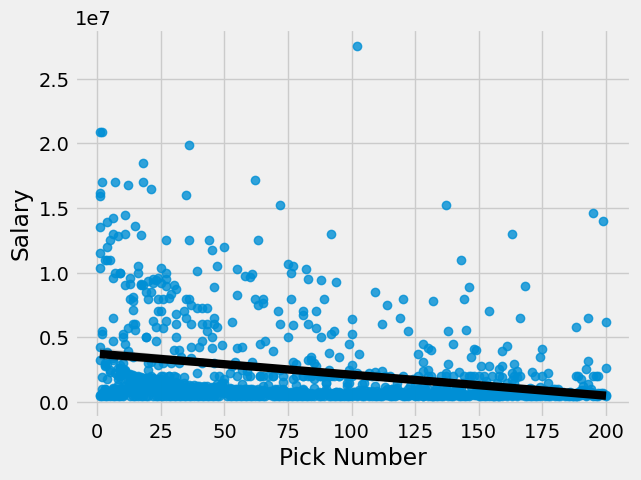

In [42]:
# Just run this cell!
sns.regplot(x = "Pick Number", y = "Salary", data = nfl, line_kws = {"color":"black"});

#### Question 8

Using the function `correlation`, find the correlation between `Pick Number` and `Salary` and assign it to `pick_salary_correlation`.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [43]:
pick_salary_correlation = correlation(nfl, 'Pick Number', 'Salary')
pick_salary_correlation

-0.2812388644684761

In [44]:
grader.check("q1_8")

q1_8 results: All test cases passed!

We can see that there is a negative association between `Pick Number` and `Salary`! 

#### Question 9

Once again, Evan thinks that the slope of the true line of best fit for `Pick Number` and `Salary` is not zero: that is, there is some correlation/association between `Pick Number` and `Salary`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.


<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

The null hypothesis is that there is no linear association between the Pick Number and the salary and teh correlation is 0.
The alternative hypothesis is that there is a linear association between the Pick Number and the Salary and the correlation is not zero.

#### Question 10

Generate 1000 bootstrapped correlations for `Pick Number` and `Salary`, append them to the array `resampled_correlations_salary`, and then plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

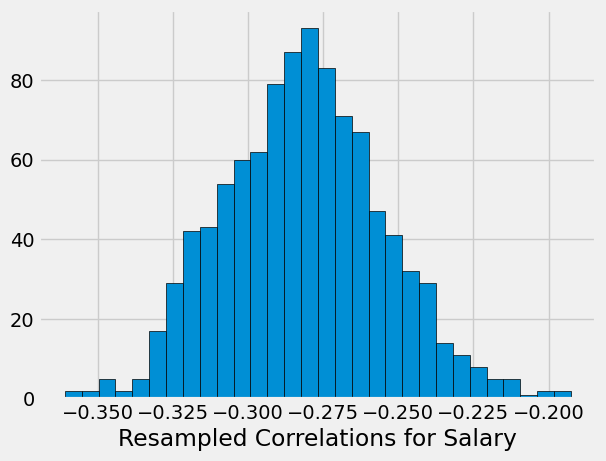

In [45]:
resampled_correlations_salary = np.empty(0)

for _ in range(1000):
    resamp_sal = nfl.sample(frac=1, replace=True)
    corr = resamp_sal['Pick Number'].corr(resamp_sal['Salary'])
    resampled_correlations_salary = np.append(resampled_correlations_salary, corr)

# Plot the histogram
plt.hist(resampled_correlations_salary, bins=30, edgecolor='black')
plt.xlabel("Resampled Correlations for Salary");

#### Question 11

Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject_sal` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.


<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [46]:
lower_bound_sal = np.percentile(resampled_correlations_salary, 2.5)
upper_bound_sal = np.percentile(resampled_correlations_salary, 97.5)

reject_sal = True

# Don't change this!
print(f"95% CI: [{lower_bound_sal}, {upper_bound_sal}], Reject the null: {reject_sal}")

95% CI: [-0.3298796774740086, -0.2285494214478586], Reject the null: True


In [47]:
grader.check("q1_11")

q1_11 results: All test cases passed!

## Submission

You're done with Lab 5! Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the Lab 5 assignment in **Canvas** by 11:59pm on the due date.